In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection     import train_test_split
import tensorflow as tf
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [7]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [8]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [9]:
scaled_data = scaler.transform(df)

In [10]:
pca = PCA(n_components=2)

In [11]:
pca.fit(scaled_data)

PCA(n_components=2)

In [12]:
x_pca = pca.transform(scaled_data)

In [13]:
scaled_data.shape

(569, 30)

In [14]:
x_pca.shape

(569, 2)

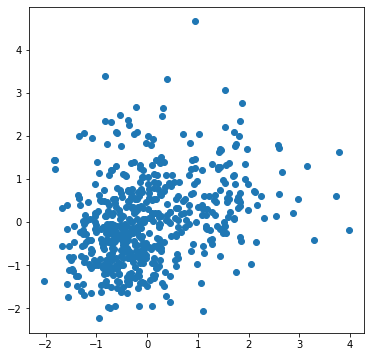

In [15]:
plt.figure(figsize = (6,6))
# Thành phần comp số 1
pca_1 = scaled_data[:, 0]
# Thành phần comp số 2
pca_2 = scaled_data[:, 1]

# Vẽ đồ thị
plt.scatter(x=pca_1, y = pca_2)

Text(0, 0.5, 'Second priciple componet')

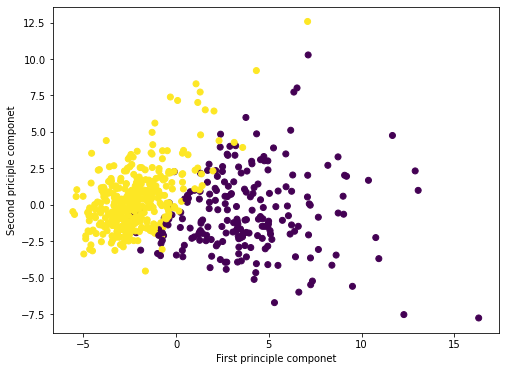

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c =cancer['target'])
plt.xlabel('First principle componet')
plt.ylabel('Second priciple componet')

In [17]:
pca_comp = pd.DataFrame(data=pca.components_, columns=df.columns)
pca_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [18]:
X = x_pca
y = cancer['target']

In [19]:
x_train, x_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=0)

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
])

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs=100, batch_size=16,validation_data=(x_valid, y_valid))

Epoch 1/100
29/29 [==============================] - 2s 21ms/step - loss: 1.0409 - accuracy: 0.1209 - val_loss: 0.9978 - val_accuracy: 0.1228
Epoch 2/100
29/29 [==============================] - 0s 10ms/step - loss: 0.9765 - accuracy: 0.1407 - val_loss: 0.9368 - val_accuracy: 0.1667
Epoch 3/100
29/29 [==============================] - 0s 7ms/step - loss: 0.9162 - accuracy: 0.1714 - val_loss: 0.8790 - val_accuracy: 0.2193
Epoch 4/100
29/29 [==============================] - 0s 9ms/step - loss: 0.8587 - accuracy: 0.2044 - val_loss: 0.8256 - val_accuracy: 0.2632
Epoch 5/100
29/29 [==============================] - 0s 11ms/step - loss: 0.8069 - accuracy: 0.2857 - val_loss: 0.7770 - val_accuracy: 0.3333
Epoch 6/100
29/29 [==============================] - 0s 9ms/step - loss: 0.7585 - accuracy: 0.4132 - val_loss: 0.7319 - val_accuracy: 0.4561
Epoch 7/100
29/29 [==============================] - 0s 7ms/step - loss: 0.7138 - accuracy: 0.5451 - val_loss: 0.6908 - val_accuracy: 0.5965
Epoch 8/10